In [8]:
import pandas as pd
import numpy as np
import datetime as dt
from importlib import reload

import TSManager as ts

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
reload(ts)
mgr = ts.TSManager()

In [10]:
mgr.load()

Loading DP
Loading PE
Loading BM
Loading CAPE
Loading BY
Loading DEF
Loading PCAPrice
Loading CPI
Loading NOS
Loading PCR
Loading OIL
Loading SI
Loading BDI
Loading CAY
Loading IC
Loading TERM
Loading VRP
Loading SPX


In [11]:
mgr.data

,DP,PE,BM,CAPE,BY,DEF,PCAPrice,CPI,NOS,PCR,OIL,SI,BDI,CAY,IC,TERM,VRP,SPX
AsOfDate,,,,,,,,,,,,,,,,,,
1990-06-08,0.063979,7.524271,NaN,8.978524,1.007418,0.96,3.616905,0.046737,0.016941,-1.622923,NaN,NaN,1278.0,-0.013576,NaN,0.50,7.197727,-0.012226
1990-06-11,0.063463,7.597792,NaN,9.051612,1.009642,0.96,3.583706,0.046737,0.016941,-1.615366,NaN,NaN,1264.0,-0.013576,NaN,0.49,5.607431,0.008140
1990-06-12,0.062662,7.699009,NaN,9.167251,1.009580,0.96,3.532720,0.046737,0.016941,-1.618868,NaN,NaN,1254.0,-0.013576,NaN,0.49,6.403252,0.012775
1990-06-13,0.062894,7.674771,NaN,9.133460,1.000056,0.96,3.547245,0.046737,0.016941,-1.625316,NaN,NaN,1243.0,-0.013576,NaN,0.47,7.793147,-0.003686
1990-06-14,0.063241,7.636994,NaN,9.083400,0.997689,0.96,3.569002,0.046737,0.016941,-1.620454,NaN,NaN,1232.0,-0.013576,NaN,0.46,7.665179,-0.005481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-30,NaN,NaN,NaN,NaN,0.816507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.87,0.16,1.700837,NaN
2019-10-31,NaN,NaN,NaN,NaN,0.776189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.82,0.15,3.148552,NaN
2019-11-01,NaN,NaN,NaN,NaN,0.795466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.78,0.21,3.309828,NaN


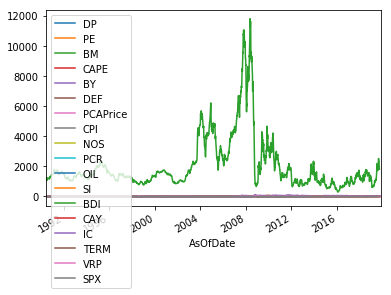

In [12]:
mgr.data.plot()

Text(0.5, 1.0, 'Percent missing data by feature')

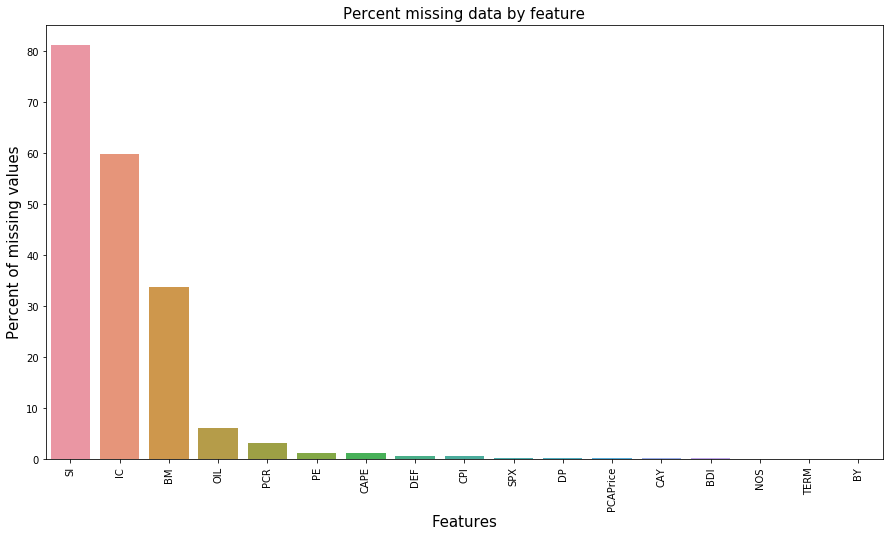

In [13]:
all_data_na = (mgr.data.isna().sum() / len(mgr.data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:17]
f, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)